In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.vision.all import *
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

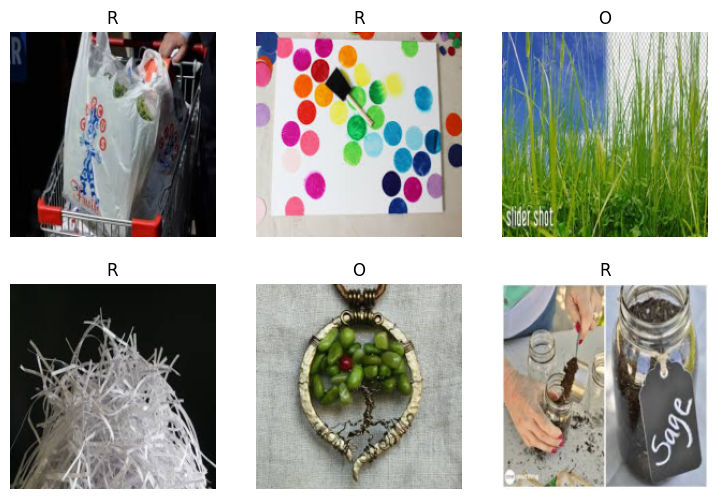

In [3]:
train = "../input/waste-classification-data/DATASET/TRAIN"
val = "../input/waste-classification-data/DATASET/TEST"
path = ".."
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    item_tfms = [Resize(192, method = 'squish')]).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [4]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 128MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.202501,0.154216,0.058524,02:51


epoch,train_loss,valid_loss,error_rate,time
0,0.119756,0.071809,0.025922,02:16
1,0.043467,0.037111,0.011864,01:58
2,0.014648,0.030384,0.008574,01:57


In [5]:
!pip install -q gradio # remove '-q' to see the output
learn.export("model.pkl")

In [6]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [8]:
import gradio as gr
gr.Interface(fn=predict,
             inputs=gr.Image(),
             outputs=gr.Label(num_top_classes=2),
            ).launch(share=True)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://62d4de604c5d07f8f3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
